# Case 2

## Import libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Loading data

In [6]:
data_path = '../data/HR_data.csv'
data = pd.read_csv(data_path)

# Saving the column names
columns = data.columns.tolist()

# Print the first few rows of the dataset
#print(data.head())

# Printing the shape of the dataset
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Checking for missing values (True/False)
print("Does the dataset have missing values?", data.isnull().values.any())

# Show the columns with missing values
missing_columns = data.columns[data.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)

The dataset has 312 rows and 68 columns.
Does the dataset have missing values? True
Columns with missing values: ['EDA_TD_P_RT', 'EDA_TD_P_ReT', 'inspired', 'attentive', 'afraid', 'active', 'determined']


## Data Wrangling

### Handling missing values

In [8]:
# Mean Imputation: Using SimpleImputer from scikit-learn to impute the missing values in the data (for numerical variables) with the mean
numerical_imputer = SimpleImputer(strategy='mean')

# Imputing the missing numerical values in the data with the mean (for columns 'EDA_TD_P_RT', 'EDA_TD_P_ReT')
data[['EDA_TD_P_RT', 'EDA_TD_P_ReT']] = numerical_imputer.fit_transform(data[['EDA_TD_P_RT', 'EDA_TD_P_ReT']])

# Mode Imputation: Using SimpleImputer from scikit-learn to impute the missing values in the data (for categorical variables) with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data = categorical_imputer.fit_transform(data)

# Converting the imputed data back to a DataFrame
data = pd.DataFrame(data, columns=columns)

# Checking for missing values (True/False)
print("Does the dataset have missing values?", data.isnull().values.any())

Does the dataset have missing values? False


### Moving Columns Around

In [76]:
# Move Unnamed: 0,Round,Phase,Individual,Puzzler,Cohort to the front of the DataFrame
data = data[['Unnamed: 0', 'Round', 'Phase', 'Individual', 'Puzzler', 'Cohort'] + [col for col in data.columns if col not in ['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']]]

In [ ]:
print

    Unnamed: 0    Round   Phase Individual Puzzler Cohort Unnamed: 0  \
0            0  round_3  phase3          1       1   D1_4          0   
1            1  round_3  phase2          1       1   D1_4          1   
2            2  round_3  phase1          1       1   D1_4          2   
3            3  round_2  phase3          1       1   D1_4          3   
4            4  round_2  phase2          1       1   D1_4          4   
..         ...      ...     ...        ...     ...    ...        ...   
307        307  round_4  phase2         26       1   D1_5        307   
308        308  round_4  phase1         26       1   D1_5        308   
309        309  round_1  phase3         26       1   D1_5        309   
310        310  round_1  phase2         26       1   D1_5        310   
311        311  round_1  phase1         26       1   D1_5        311   

     HR_TD_Mean HR_TD_Median  HR_TD_std  ... upset hostile alert ashamed  \
0     78.663878         76.7   7.480043  ...   1.0     1.0 

### Splitting the Data Into Self-Rated Questionaire and Bio-Signals

In [84]:
# Self-Rated Questionaire
self_rated = data.iloc[:, -11:]

# Bio-Signals
bio_signals = data.iloc[:, :-11]
# Only keep the columns that starts with 'HR', 'TEMP', or 'EDA'
bio_signals = bio_signals.loc[:, bio_signals.columns.str.startswith(('HR', 'TEMP', 'EDA'))]

## Data Exploration

### Self-Rated Questionaire

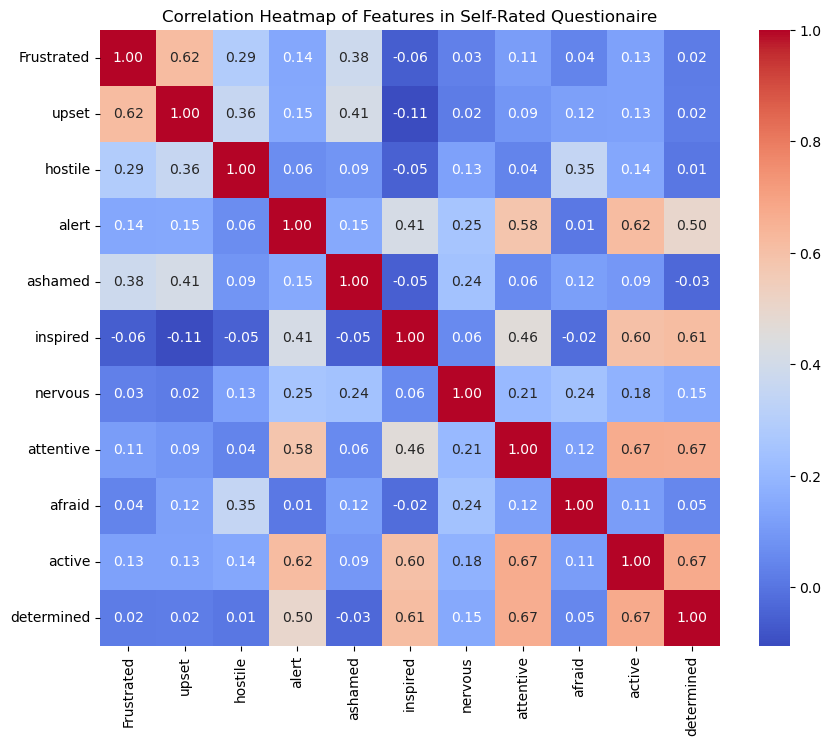

In [105]:
# Making a heatmap of the last 11 columns of the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(self_rated.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features in Self-Rated Questionaire')
plt.show()

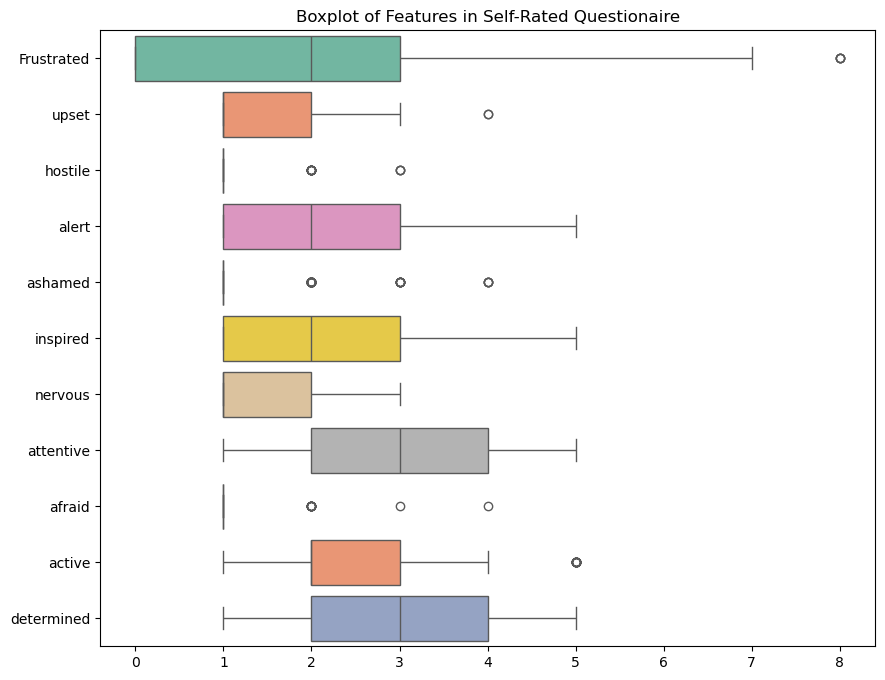

In [103]:
# Making a boxplot of the last 11 columns of the dataset
plt.figure(figsize=(10, 8))
sns.boxplot(data=self_rated, orient='h', palette='Set2')
plt.title('Boxplot of Features in Self-Rated Questionaire')
plt.show()

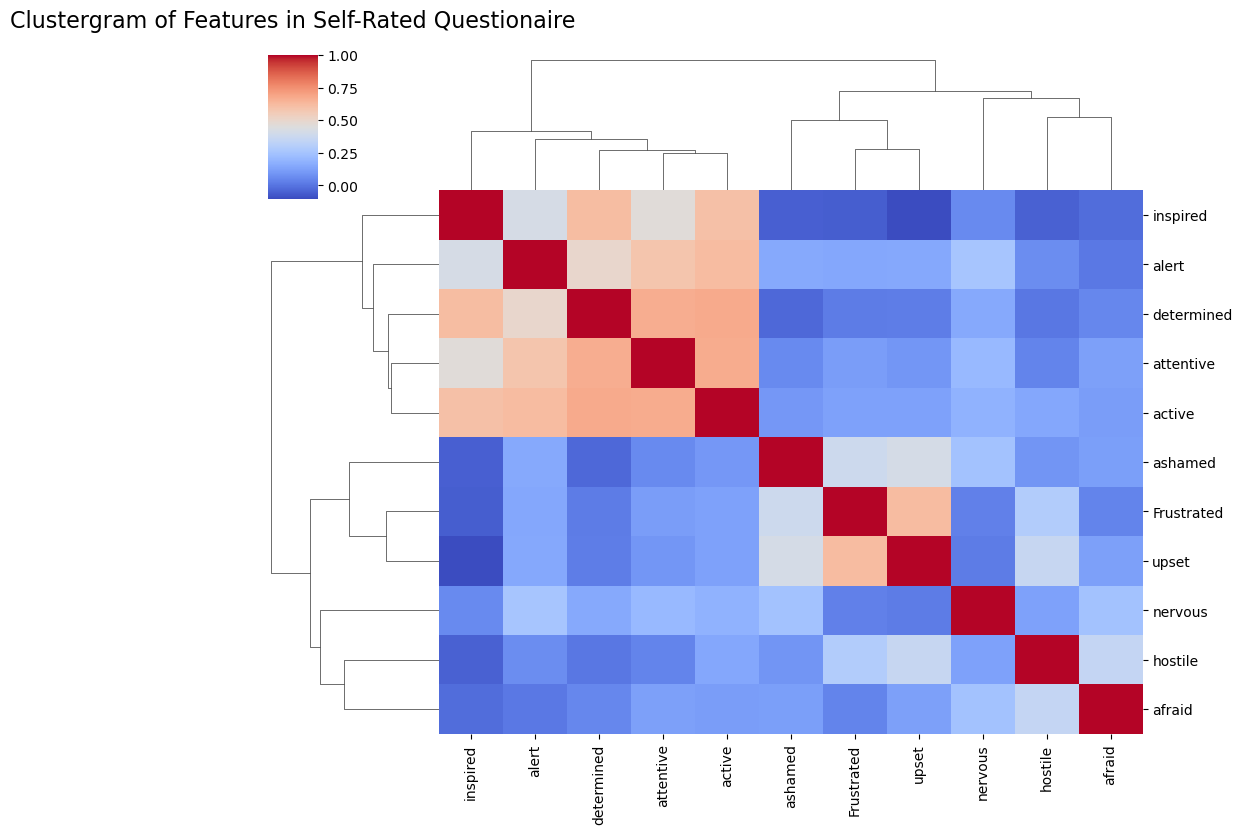

In [115]:
# Creating a clustergram of the last 11 columns of the dataset
sns.clustermap(self_rated.corr(), cmap='coolwarm', figsize=(10, 8))
plt.title('Clustergram of Features in Self-Rated Questionaire', fontsize=16, pad=20)
plt.show()

### Bio-Signals

<Figure size 1000x800 with 0 Axes>

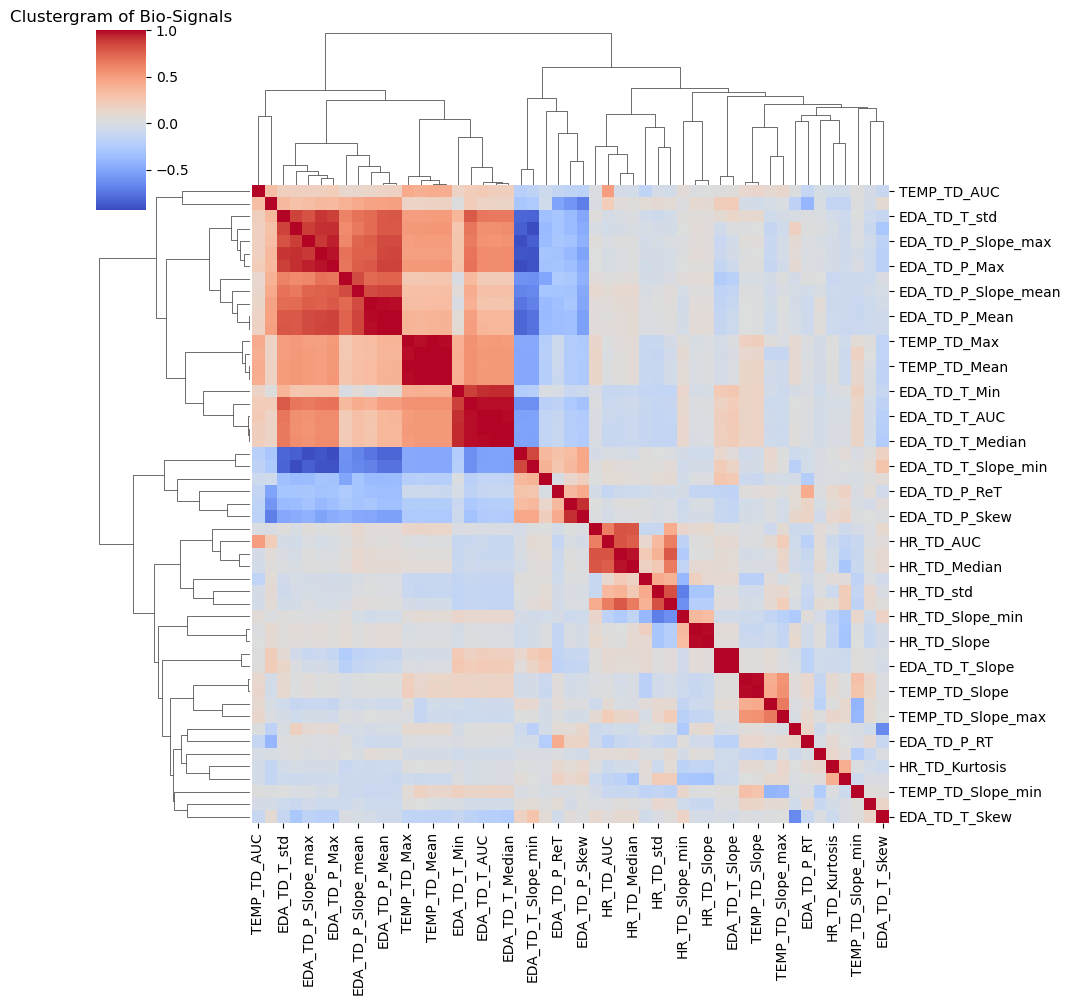

In [116]:
# Making a clustergram (heatmap + dendrogram) of the bio-signals
plt.figure(figsize=(10, 8))
sns.clustermap(bio_signals.corr(), cmap='coolwarm')
plt.title('Clustergram of Bio-Signals')
plt.show()